# Gomez2010 Starvation plots

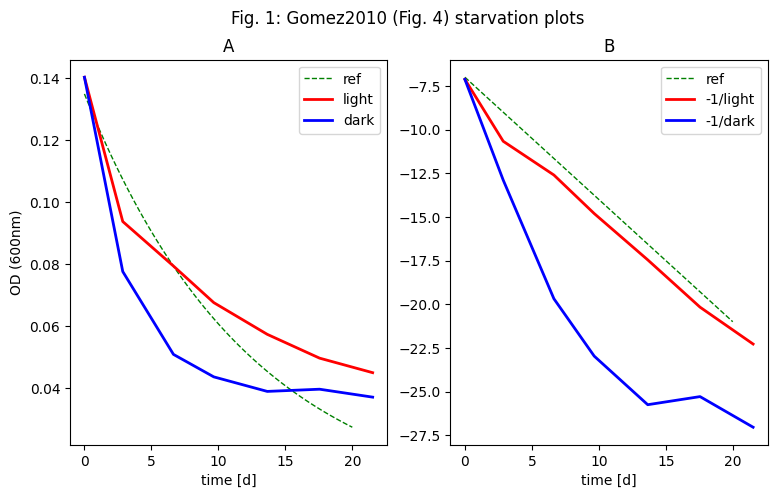

#OG data:
x-axis: 
 [0.0, 2.861401024326425, 6.6467970390398055, 9.657228457101676, 13.651266477275756, 17.555888444284253, 21.520119294173455]
y-axis: 
 [0.140398858225244, 0.0937464343992054, 0.0793589743589743, 0.0675356103619959, 0.0572791935847356, 0.0495868858924279, 0.0448860311915732]


In [11]:
import matplotlib.pyplot as plt
import numpy as np
import csv
import math
from scipy.optimize import curve_fit
from scipy import stats

def importcsv(src, xoffset=0, yoffset=0):
    coord = [[] for i in range(2)]
    j = 0
    with open(src, newline='') as csvfile:
        readdata = csv.reader(csvfile, delimiter=',', quotechar='"')
        for row in readdata:
            coord[0].append(float(row[0]) + xoffset)
            coord[1].append(float(row[1]) + yoffset)
        return coord

# importing input data
light = importcsv('Data/starvplot_gomez2010-Fig4_light.csv',0.0298071702849555)
x = light[0]
dark = importcsv('Data/starvplot_gomez2010-Fig4_dark.csv')
color_light = 'red'
color_dark = 'blue'

# generating generic plots as a reference against data
x_linear = np.linspace(0,20)
y_exp = 0.135*np.exp(-0.08*x_linear)
y_linrzd = [(-0.7*data-7) for data in x_linear]

color_val = 'green'


# Figure & Subplots
fig, ax = plt.subplots(1, 2, figsize=(9,5))

# original Plots
## baseline exp. plot
ax[0].plot(x_linear, y_exp, linewidth=1.0, color=color_val ,linestyle='dashed', label='ref')

## originial data plots
ax[0].plot(x, light[1], linewidth=2.0, color=color_light, label='light')
ax[0].set_yscale('linear')
ax[0].plot(x, dark[1], linewidth=2.0, color=color_dark,  label='dark')


# linearized Plots
## baseline linearized 1/x plot
ax[1].plot(x_linear, y_linrzd, linewidth=1.0, color=color_val ,linestyle='dashed', label='ref')

## linearized original data plots
### linearized 1/x
light_lin1 = [-math.pow(data,-1) for data in light[1]]
dark_lin1 = [-math.pow(data,-1) for data in dark[1]]
ax[1].plot(x, light_lin1, linewidth=2.0, color=color_light, label='-1/light')
ax[1].plot(x, dark_lin1, linewidth=2.0, color=color_dark, label='-1/dark')


# Labeling, Axis-formatting etc.
[axes.set_xlabel("time [d]") for axes in ax]
ax[0].set_ylabel("OD (600nm)")
ax[0].set_title("A")
ax[1].set_title("B")
ax[0].legend()
ax[1].legend()
fig.suptitle('Fig. 1: Gomez2010 (Fig. 4) starvation plots')

plt.show()

print('#OG data:')
print('x-axis: \n', light[0])
print('y-axis: \n', light[1])
#print('y-axis Log-scale: \n', light_log)


**Figure 1**: Optical Density als Indikator für Zellzahl von AND4 Wildtyp geplottet über Zeit. Inkubation unter low DOC-Bedingungen einmal unter Licht und in Dunkelheit. **A**: Original-Plots mit grün-gestricheltem Graph als Referenzgraph mit $1/e^x$-Dynamik. **B**: Linearisierte Plots durch 1/f(x) mit grün-gestricheltem Referenzgraph der Form f(x)=1/x

#### Umrechnung: Optical Density in Bakterienkonzentration
Die optische Dichte oder Extinktion $E_{\lambda}$ von Licht kann über das Lambert-Beer Gesetz beschrieben werden:
$$ E_{\lambda}=log\left(\frac{I_0}{I}\right)=\epsilon_{\lambda} \cdot c \cdot d $$
mit Lichtintensität I, Stoffmengenkonzentration c, Extinktionskoeffizienten $\epsilon_{\lambda}$ Schichtdicke des durchstrahlten Körpers. \([Wiki](https://de.wikipedia.org/wiki/Lambert-beersches_Gesetz)\)

Unter Annahme, dass $\epsilon_{\lambda}$ und $d$ konstant sind, ergibt sich also ein proportionaler Zusammenhang zwischen der Optischen Dichte und der Konzentration von Mikroorganismen im Medium.

$$ 

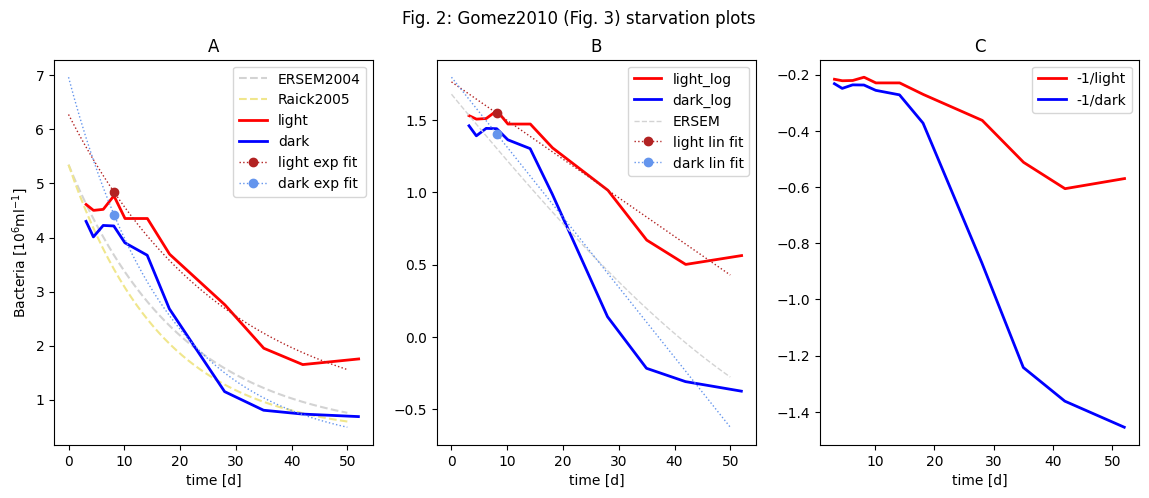

*A:*
Exponential fit (light): 5.666 * exp( -0.036 * x) + 0.611
Exponential fit (dark): 6.882 * exp( -0.057 * x) + 0.084
*B:*
Linear over Log fit (light): -0.027  * x +  1.762
Linear over Log fit (dark): -0.048  * x +  1.794


In [12]:
import warnings

# suppress numpy warnings
np.seterr(all='ignore')

# define boilerplate exp functionp
def expBp(x, m, r, b=0):
    return m * np.exp(-r * x) + b

# import and prepare data from csv
light = importcsv('Data/starvplot_gomez2010-Fig3_light.csv')
light_log = [math.log(data) for data in light[1]]
dark = importcsv('Data/starvplot_gomez2010-Fig3_dark.csv')
dark_log = [math.log(data) for data in dark[1]]

fig, ax2 = plt.subplots(1, 3, figsize=(14,5))

# generate exponential curve fit data 
exEx = 3
light_opt, pconf = curve_fit(expBp, light[0][exEx:], light[1][exEx:])
dark_opt, pconf = curve_fit(expBp, dark[0][exEx:], dark[1][exEx:])
x_linear = np.linspace(0,50)

# generate linear curve fit data
exLin = 3
light_lrg = stats.linregress(light[0][exLin:], light_log[exLin:])
dark_lrg = stats.linregress(dark[0][exLin:], dark_log[exLin:])

# sample exp plot
cfit_avgoffs = ((light_opt[2]+dark_opt[2])/2)
ax2[0].plot(x_linear, expBp(x_linear, 5, 0.05, cfit_avgoffs), color='lightgrey', linestyle='dashed', label='ERSEM2004')
ax2[0].plot(x_linear, expBp(x_linear, 5, 0.06, cfit_avgoffs), color='khaki', linestyle='dashed', label='Raick2005')

# Original plots
ax2[0].plot(light[0][0:], light[1][0:], linewidth=2.0, color=color_light, label='light')
ax2[0].plot(dark[0], dark[1], linewidth=2.0, color=color_dark, label='dark')
##  fitted with markers on the first point used for the "fitting calculations"
markExL = int(np.rint(light[0][exEx]))
markExD =  int(np.rint(dark[0][exEx]))
ax2[0].plot(x_linear, expBp(x_linear, *light_opt) , linewidth=1.0, color='firebrick' ,linestyle='dotted', label='light exp fit', markevery=[markExL], marker='o')
ax2[0].plot(x_linear, expBp(x_linear, *dark_opt) , linewidth=1.0, color='cornflowerblue' ,linestyle='dotted', label='dark exp fit', markevery=[markExD], marker='o')

# ln plots
ax2[1].plot(light[0], light_log, color=color_light, linewidth=2.0, label='light_log')
ax2[1].plot(dark[0], dark_log, color=color_dark, linewidth=2.0, label='dark_log')
ax2[1].plot(x_linear, [math.log(data) for data in expBp(x_linear, 5, 0.05, cfit_avgoffs)] , linewidth=1.0, color='lightgrey' ,linestyle='dashed', label='ERSEM')
## fitted
markLinL = int(np.rint(light[0][exLin]))
markLinD =  int(np.rint(dark[0][exLin]))
ax2[1].plot(x_linear, light_lrg.intercept+light_lrg.slope*x_linear, linewidth=1.0, color='firebrick', linestyle='dotted', label='light lin fit', markevery=[markLinL], marker='o')
ax2[1].plot(x_linear, dark_lrg.intercept+dark_lrg.slope*x_linear, linewidth=1.0, color='cornflowerblue', linestyle='dotted', label='dark lin fit', markevery=[markLinD], marker='o')

# -1/x plots
ax2[2].plot(light[0], [-1/data for data in light[1]], color=color_light, linewidth=2.0, label='-1/light')
ax2[2].plot(dark[0], [-1/data for data in dark[1]], color=color_dark, linewidth=2.0, label='-1/dark')

# labelling etc.
[axes.set_xlabel("time [d]") for axes in ax2]
[axes.legend() for axes in ax2]
ax2[0].set_ylabel('Bacteria [$ 10^6$ml$^{-1}$]')
ax2[0].set_title('A')
ax2[1].set_title('B')
ax2[2].set_title('C')
fig.suptitle('Fig. 2: Gomez2010 (Fig. 3) starvation plots')

plt.show()
print('*A:*')
print('Exponential fit (light):',np.round(light_opt[0],3),'* exp(',-np.round(light_opt[1],3),'* x) +',np.round(light_opt[2],3))
print('Exponential fit (dark):',np.round(dark_opt[0],3),'* exp(',-np.round(dark_opt[1],3),'* x) +',np.round(dark_opt[2],3))
print('*B:*')
print('Linear over Log fit (light):', np.round(light_lrg.slope,3),' * x', '+ ',np.round(light_lrg.intercept,3))
print('Linear over Log fit (dark):', np.round(dark_lrg.slope,3),' * x', '+ ',np.round(dark_lrg.intercept,3))



**Figure 2:** Zeitlicher Verlauf von Bakterienkonzentration in Laborbexperimenten. Plot der Die-Off Phase in low-DOC Umgebung jeweils mit und ohne Lichtexposition . **A:** Originaldaten **B:** Kurven logarithmisch angepasst **C:** Kurven angepasst mit $-1/f$